In [39]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate()

In [40]:
using LinearAlgebra
using PyPlot
using ForwardDiff

In [75]:
ℓ = 1.0
m = 1.0
c = 30.0
g = 9.81

function f(x)
    #pendulum dynamics
    
    θ = x[1]
    θ̇ = x[2]
    
    ẋ = [θ̇; -(g/ℓ)*sin(θ) - (c/m)*θ̇]
end

f (generic function with 1 method)

In [76]:
function explicit_midpoint_step(xk)
    xm = xk + 0.5*h*f(xk)
    xn = xk + h*f(xm)
end

explicit_midpoint_step (generic function with 1 method)

In [77]:
function rk4_step(xk)
    f1 = f(xk)
    f2 = f(xk + 0.5*h*f1)
    f3 = f(xk + 0.5*h*f2)
    f4 = f(xk + h*f3)
    
    xn = xk + (h/6.0).*(f1 + 2*f2 + 2*f3 + f4)
end

rk4_step (generic function with 1 method)

In [78]:
function implicit_euler_step(xk)
    xn = xk
    r = xn - xk - h*f(xn)
    while maximum(abs.(r)) > 1e-12
        R = ForwardDiff.jacobian(x -> x-xk-h*f(x), xn)
        Δxn = -R\r
        xn += Δxn
        r = xn - xk - h*f(xn)
    end
    
    return xn
end

implicit_euler_step (generic function with 1 method)

In [79]:
function implicit_midpoint_step(xk)
    xn = xk
    r = xn - xk - h*f(0.5*xk + 0.5*xn)
    while maximum(abs.(r)) > 1e-12
        R = ForwardDiff.jacobian(x -> x-xk-h*f(0.5*xk + 0.5*x), xn)
        Δxn = -R\r
        xn += Δxn
        r = xn - xk - h*f(0.5*xk + 0.5*xn)
    end
    
    return xn
end

implicit_midpoint_step (generic function with 1 method)

In [80]:
function simulate_explicit_mid!(xtraj, N)
    for k = 1:(N-1)
        xtraj[:,k+1] .= explicit_midpoint_step(xtraj[:,k])
    end
end

simulate_explicit_mid! (generic function with 1 method)

In [81]:
function simulate_rk4!(xtraj, N)
    for k = 1:(N-1)
        xtraj[:,k+1] .= rk4_step(xtraj[:,k])
    end
end

simulate_rk4! (generic function with 1 method)

In [82]:
function simulate_implicit_euler!(xtraj, N)
    for k = 1:(N-1)
        xtraj[:,k+1] .= implicit_euler_step(xtraj[:,k])
    end
end

simulate_implicit_euler! (generic function with 1 method)

In [83]:
function simulate_implicit_mid!(xtraj, N)
    for k = 1:(N-1)
        xtraj[:,k+1] .= implicit_midpoint_step(xtraj[:,k])
    end
end

simulate_implicit_mid! (generic function with 1 method)

In [84]:
Tf = 10.0
h = 0.1 #10 Hz
N = Int(floor(Tf./h + 1))
thist = h.*Array(0:(N-1));

In [85]:
x0 = [90*(pi/180); 0.0]
xtraj1 = zeros(2,N)
xtraj2 = zeros(2,N)
xtraj3 = zeros(2,N)
xtraj4 = zeros(2,N)
xtraj1[:,1] = x0;
xtraj2[:,1] = x0;
xtraj3[:,1] = x0;
xtraj4[:,1] = x0;

In [86]:
simulate_explicit_mid!(xtraj1, N)

In [87]:
simulate_rk4!(xtraj2, N)

In [88]:
simulate_implicit_euler!(xtraj3, N)

In [89]:
simulate_implicit_mid!(xtraj4, N)

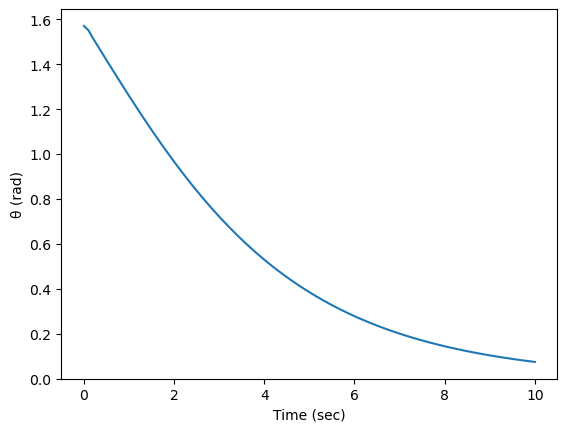

PyObject Text(24.000000000000007, 0.5, 'θ (rad)')

In [94]:
#plot(thist,xtraj1[1,:])
#plot(thist,xtraj2[1,:])
#plot(thist,xtraj3[1,:])
plot(thist,xtraj4[1,:])
xlabel("Time (sec)")
ylabel("θ (rad)")
#legend(["Exp Mid", "RK4", "Imp Euler", "Imp Mid"])

In [73]:
using TrajOptPlots
using MeshCat
using StaticArrays
using RobotZoo

vis = Visualizer()
TrajOptPlots.set_mesh!(vis, RobotZoo.Pendulum())
render(vis)

MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("meshcat" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("robot" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geom" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("rod" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x74, 0x2f, 0x67, 0x65, 0x6f, 0x6d, 0x2f, 0x72, 0x6f, 0x64], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "hinge" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x2f, 0x68, 0x69, 0x6e, 0x67, 0x65], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "mass" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x2f, 0x67, 0x65, 0x6f, 0x6d, 0x2f, 0x6d, 0x61, 0x73, 0x73], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))))))))), Set{Any}(), ip"127.0.0.1", 8700))

In [74]:
X1 = [SVector{2}(x) for x in eachcol(xtraj3)];
visualize!(vis, RobotZoo.Pendulum(), thist[end], X1)